# Rhythm triangles

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import ternary
import h5py

from utils import split_at_nan, sliding_window, interval_motifs, normalize
from triangleplots import subset, setup_rhythm_plot, show_integer_ratios, show_triangle_scatter

In [2]:
# The directory with all catafolk data
CATAFOLK_DIR = '~/surfdrive/catafolk'

# The directory with all Tsimané transcriptions
TSIMANE_DIR = '~/repos/papers/tsimane/transcriptions/musicxml'

# The main data file
# DATA_STORE = '../data/test.hdf5'
DATA_STORE = '../data/data.hdf5'

# Settings and global variables
plt.rcParams['font.sans-serif'] = ['Arial', 'HelveticaNeue', 'Helvetica']

# Save figures?
SAVE = False

In [3]:
with h5py.File(DATA_STORE, 'r') as file:
    CORPORA = [key for key in file.keys()]

In [4]:
def load_data(corpus, repeats=False):
    """Load the pitches and onsets for every entry in a corpus. The pitches and
    onsets are both lists of numpy arrays of equal length."""
    with h5py.File(DATA_STORE, 'r') as file:
        root = f"{corpus}/{'with' if repeats else 'without'}-repeats/"
        all_onsets = file[f'{root}/onsets'][:]
        all_pitches = file[f'{root}/pitches'][:]
        assert len(all_pitches) == len(all_onsets)

    if len(all_onsets) == 0: return [], []
    onsets = split_at_nan(all_onsets)
    pitches = split_at_nan(all_pitches)
    assert len(onsets) == len(pitches)
    return onsets, pitches

onsets, pitches = load_data(CORPORA[0])

/Users/bas/repos/papers/melody-squares/env/lib/python3.9/site-packages/ternary/plotting.py:148: UserWarning: No data for colormapping provided via 'c'. Parameters 'vmin', 'vmax' will be ignored
  ax.scatter(xs, ys, vmin=vmin, vmax=vmax, **kwargs)


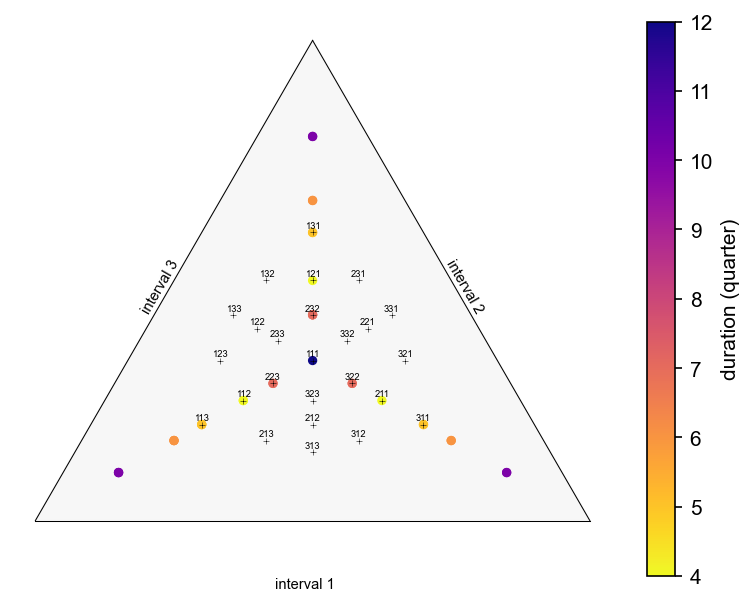

In [5]:
demo_onsets = [
    np.cumsum([0, 1, 1, 2, 1, 1, 2]),
    np.cumsum([0, 4, 4, 4]),
    np.cumsum([0, 1, 1, 3, 1, 1, 3, 1, 1, 3]),
    np.cumsum([0, 1, 1, 4, 1, 1, 4, 1, 1, 4]),
    np.cumsum([0, 1, 1, 8, 1, 1, 8, 1, 1, 8]),
    np.cumsum([0, 2, 3, 2, 2, 3, 2, 2, 3, 2]),
]
motifs, duration = normalize(interval_motifs(demo_onsets, 3))
show_triangle_scatter(motifs, duration, alpha=1, s=20, min_dur=0.0, max_dur=1.0);

/var/folders/1t/tnd98x8d6mb96jtg7fnz5y2c0000gn/T/ipykernel_9410/2966717352.py:8: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.
  plt.figure()


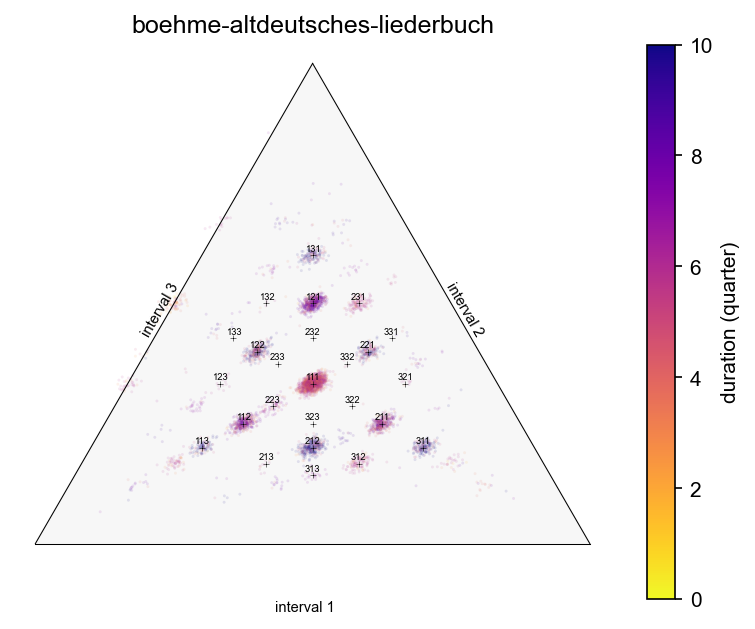

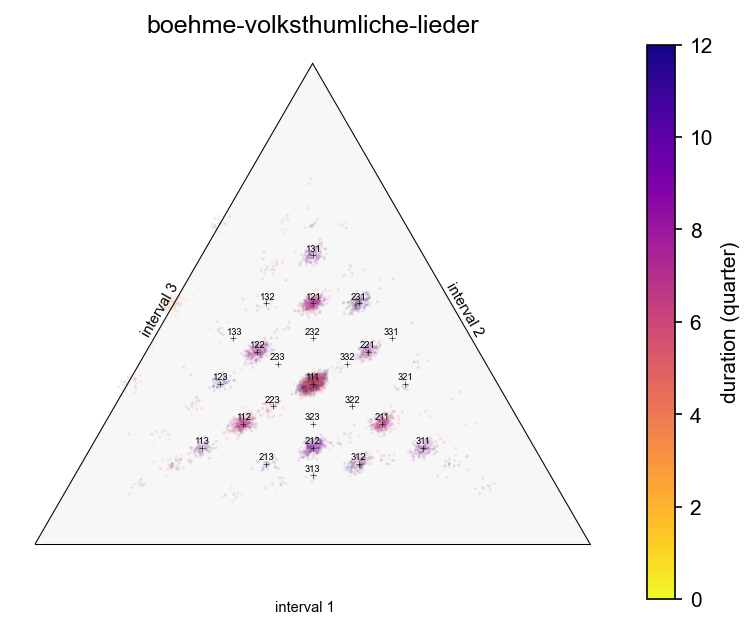

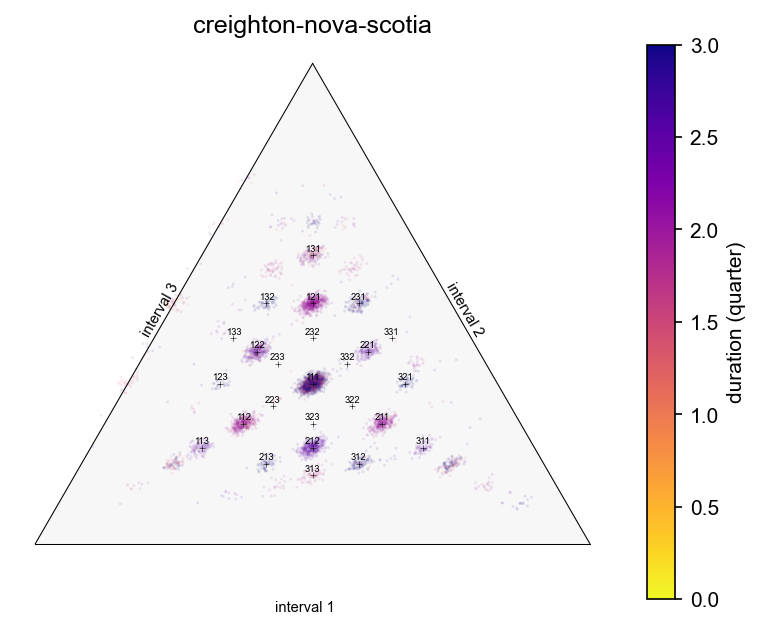

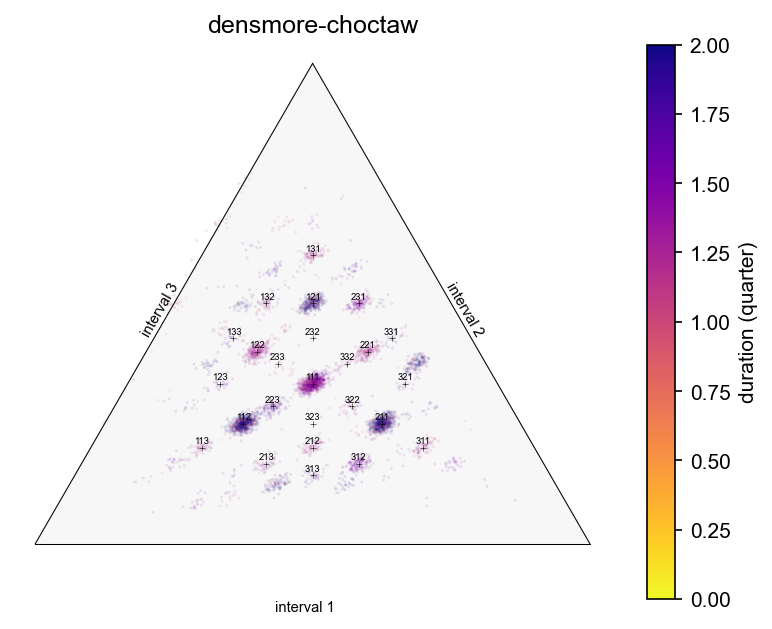

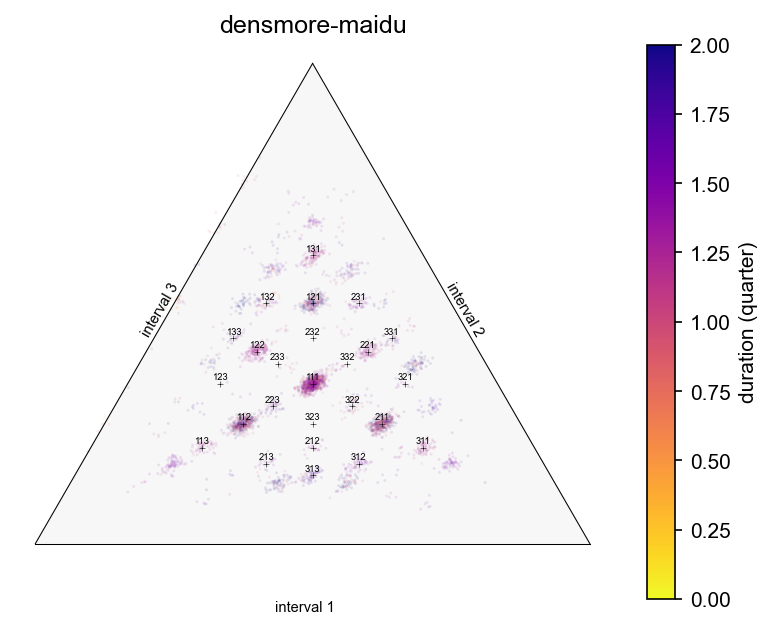

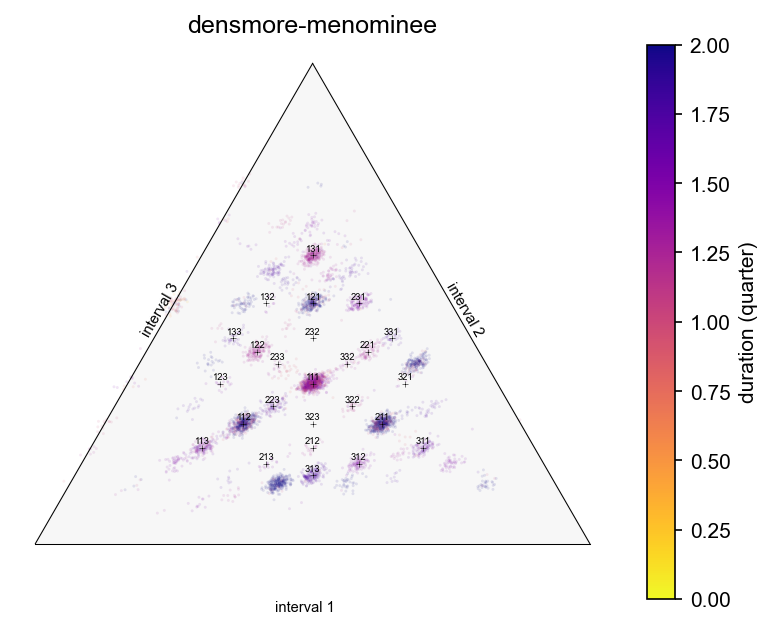

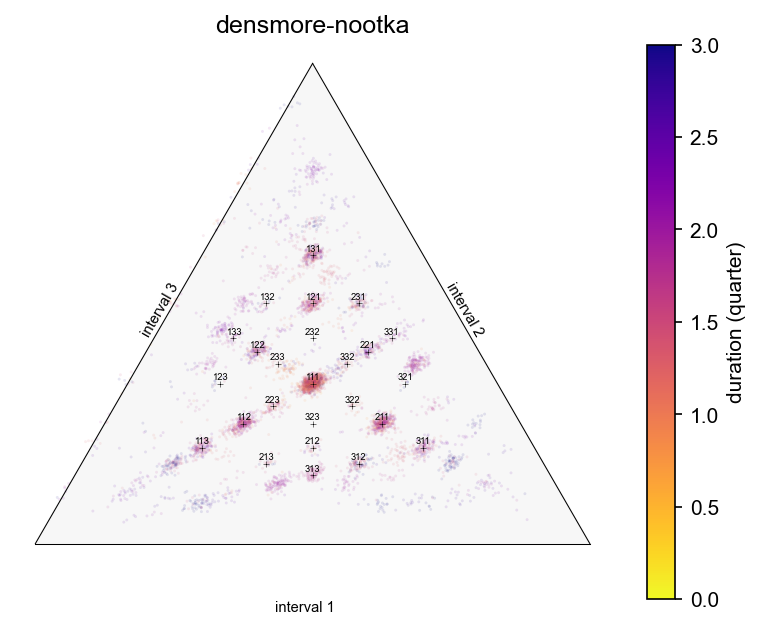

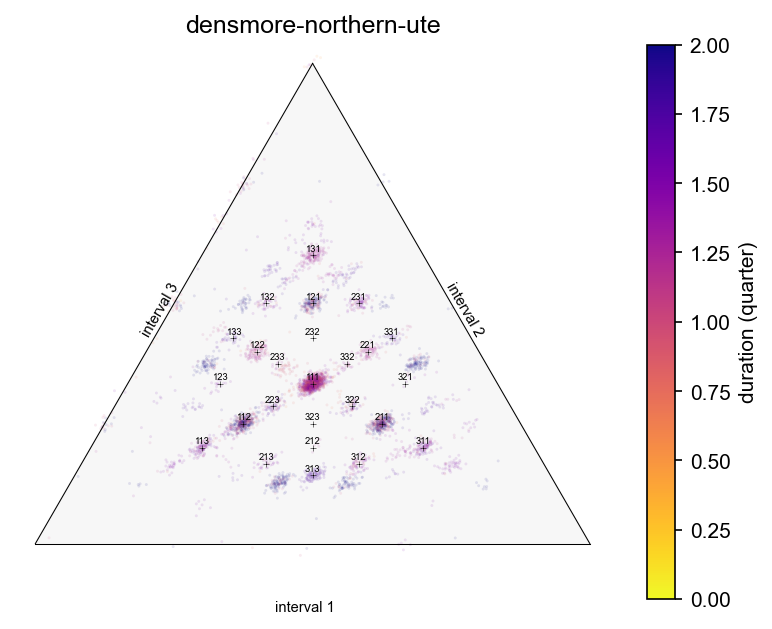

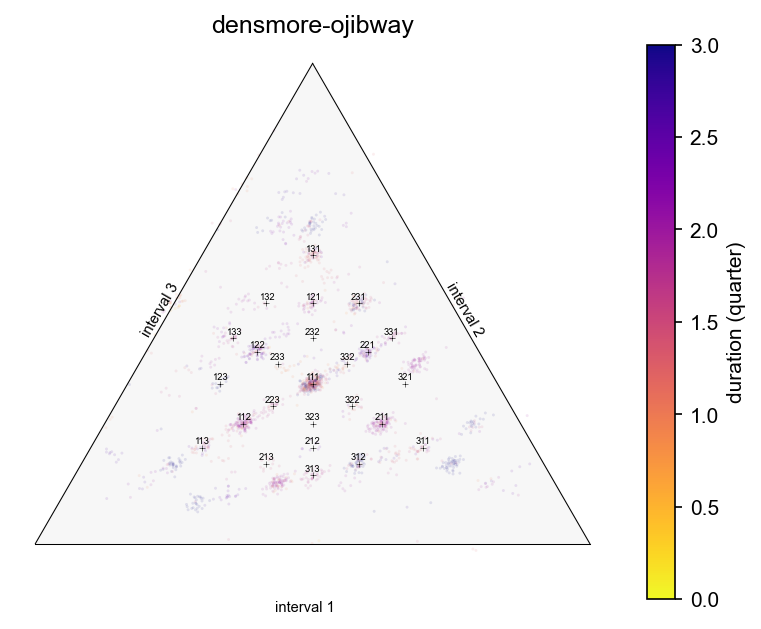

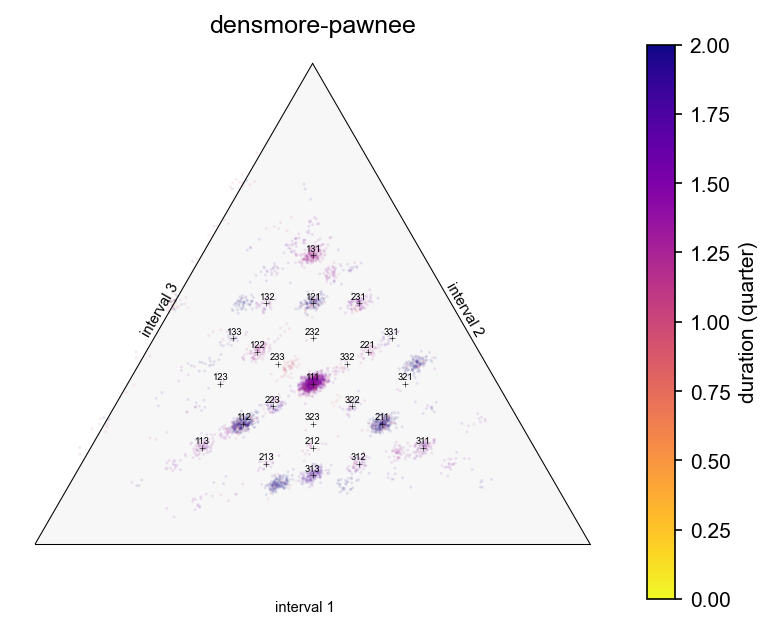

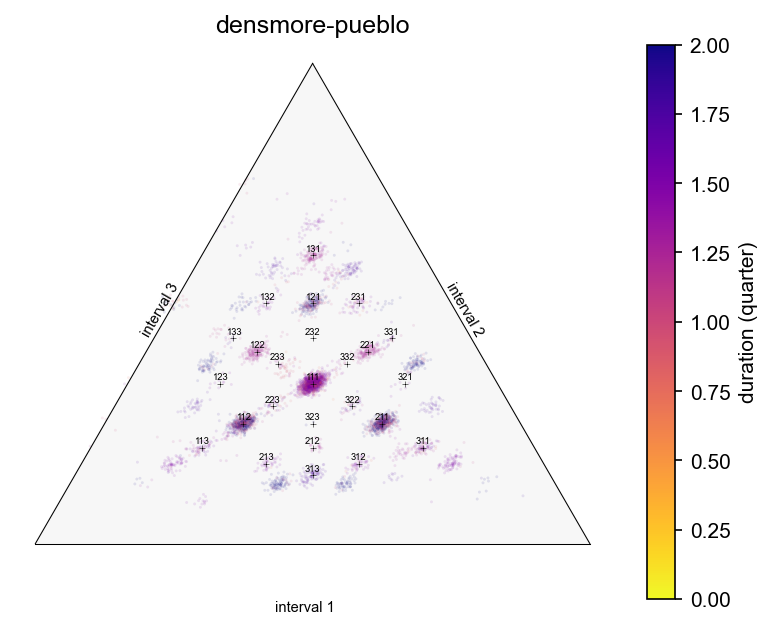

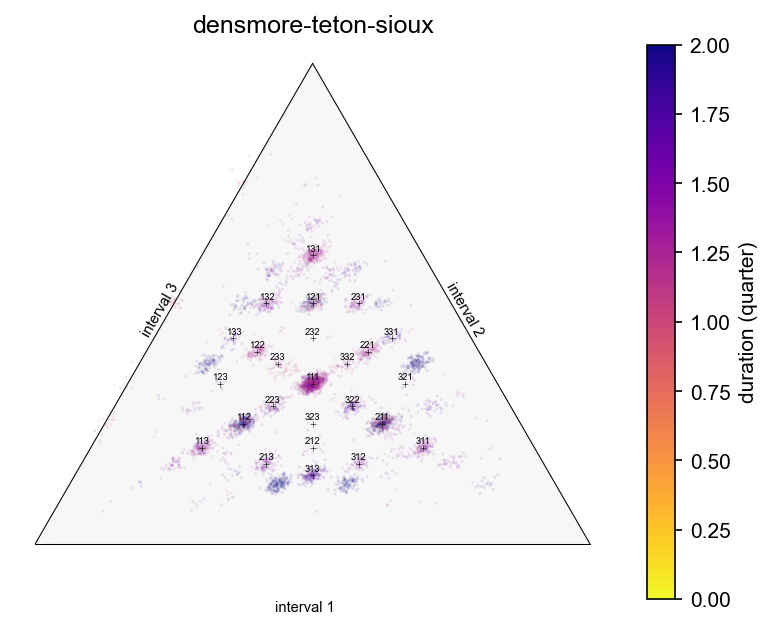

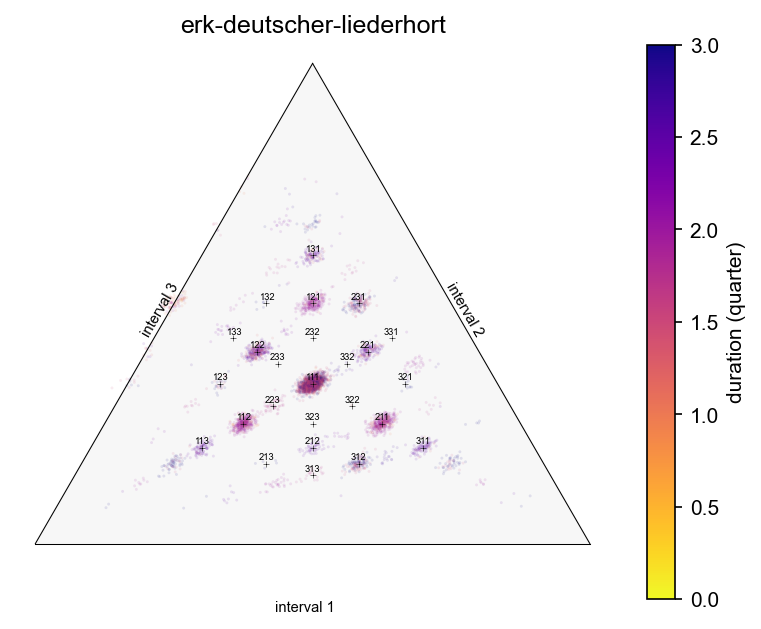

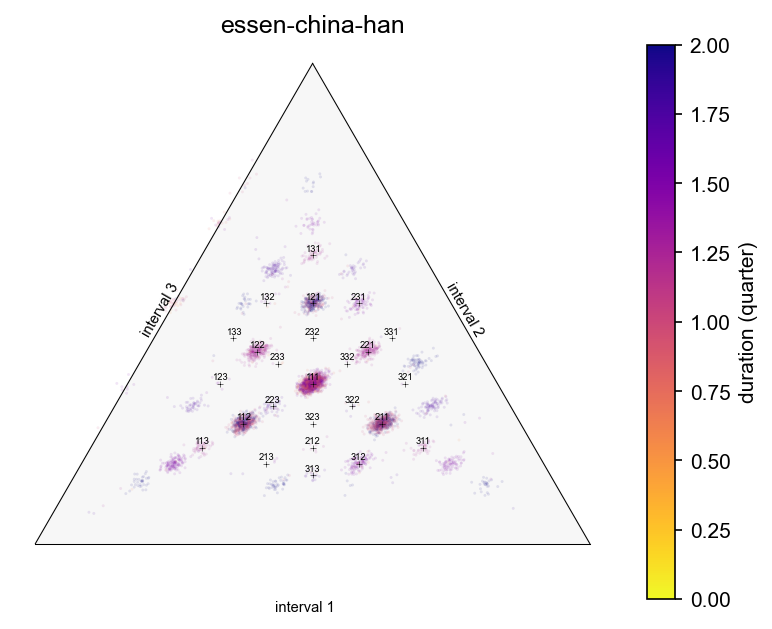

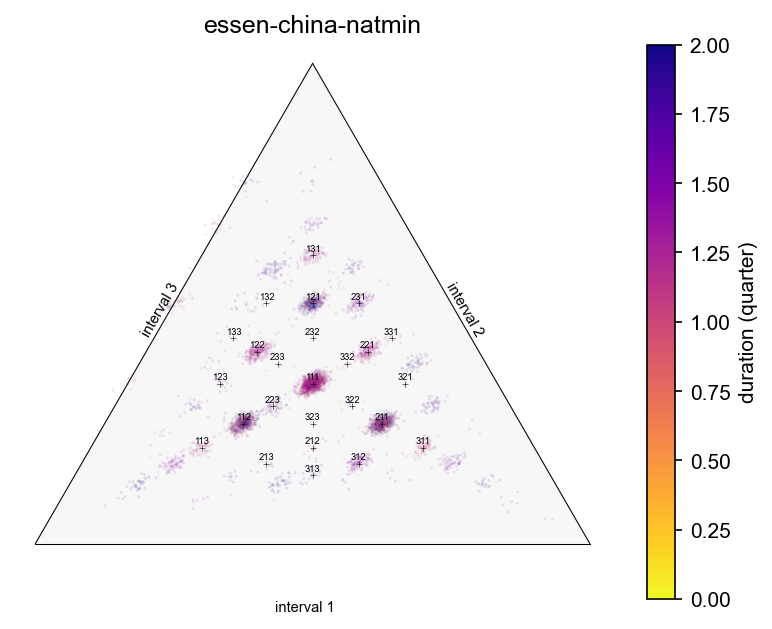

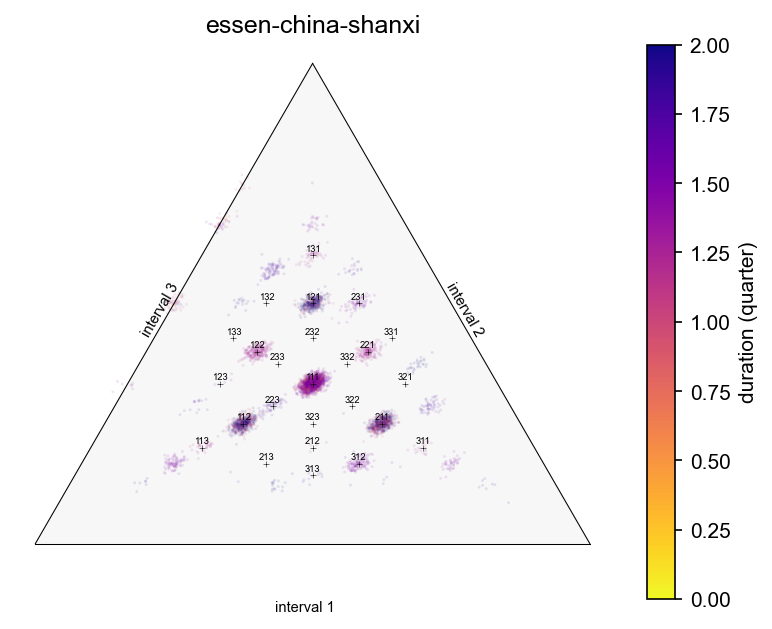

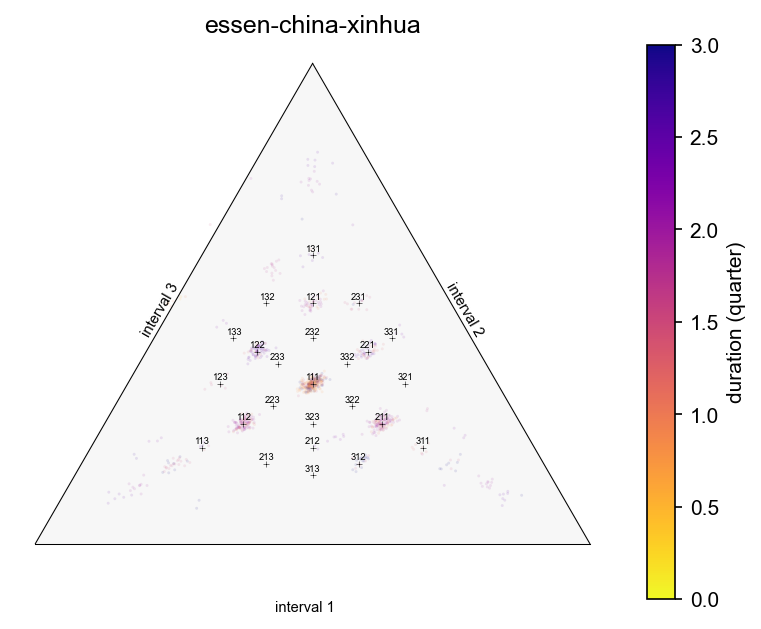

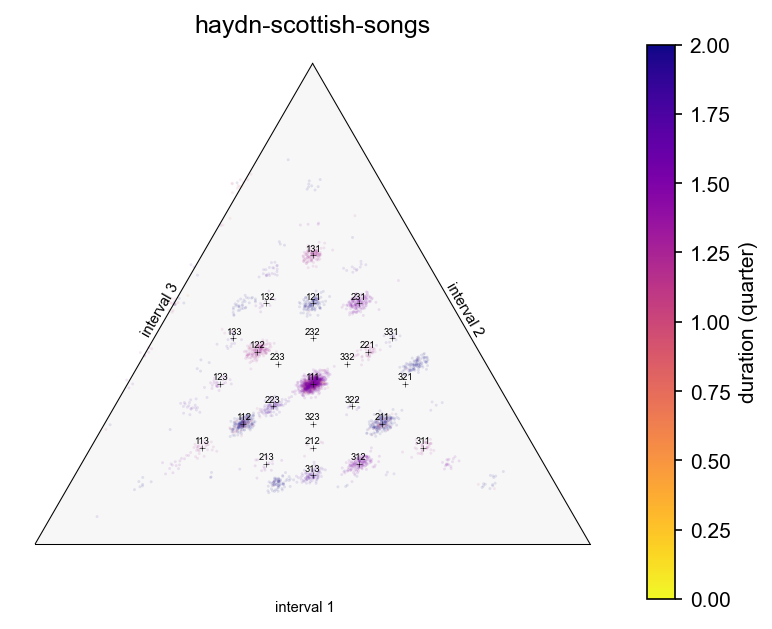

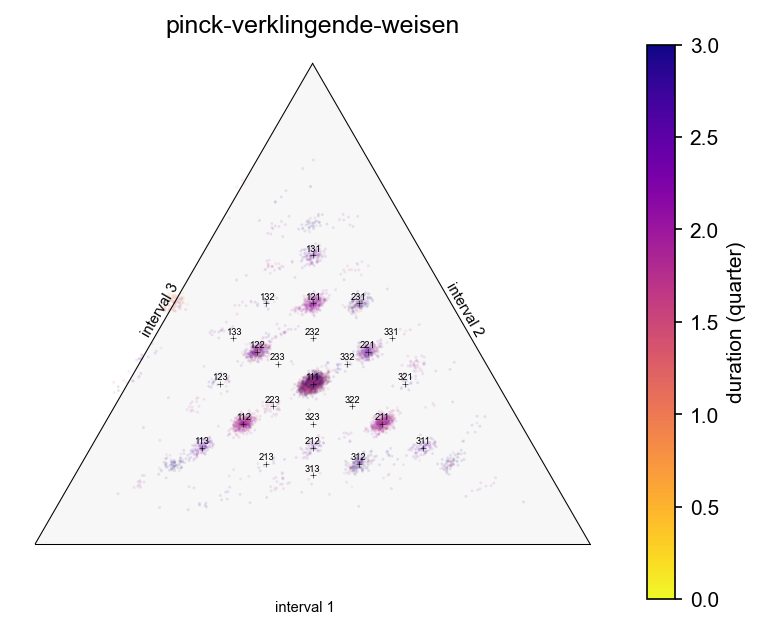

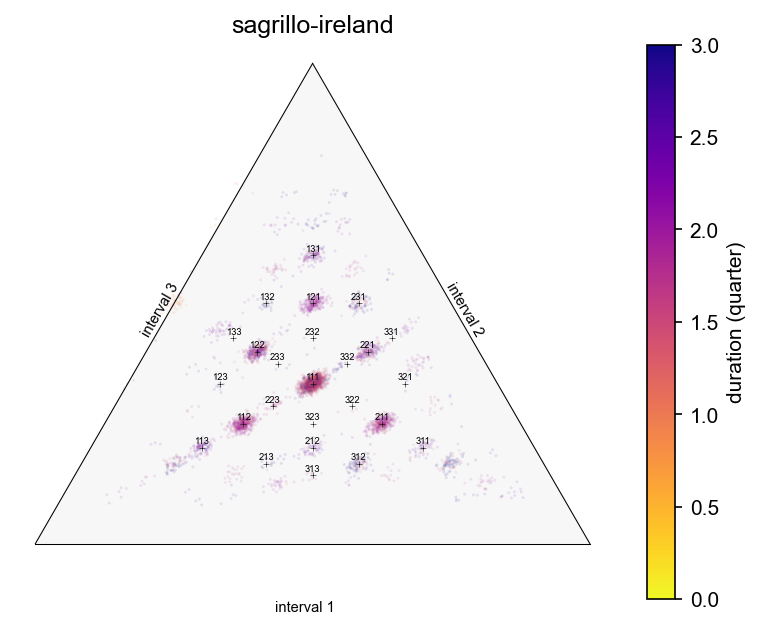

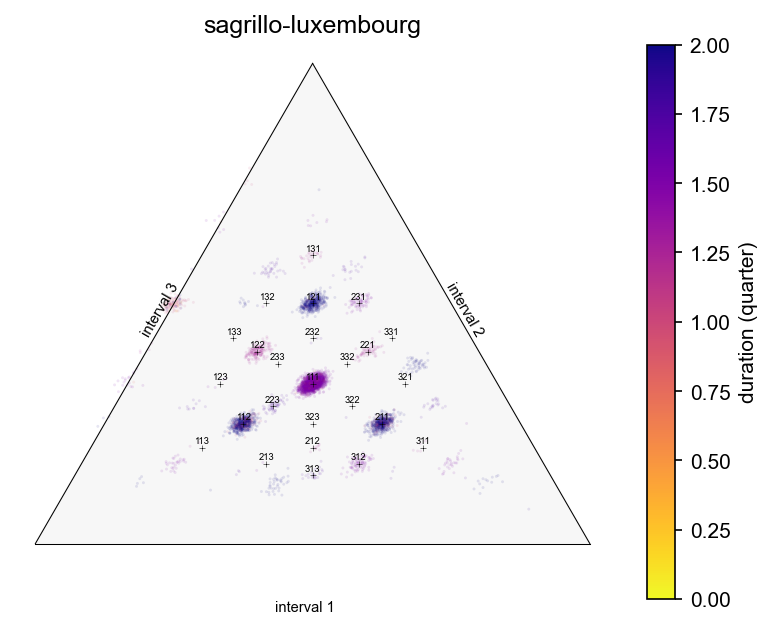

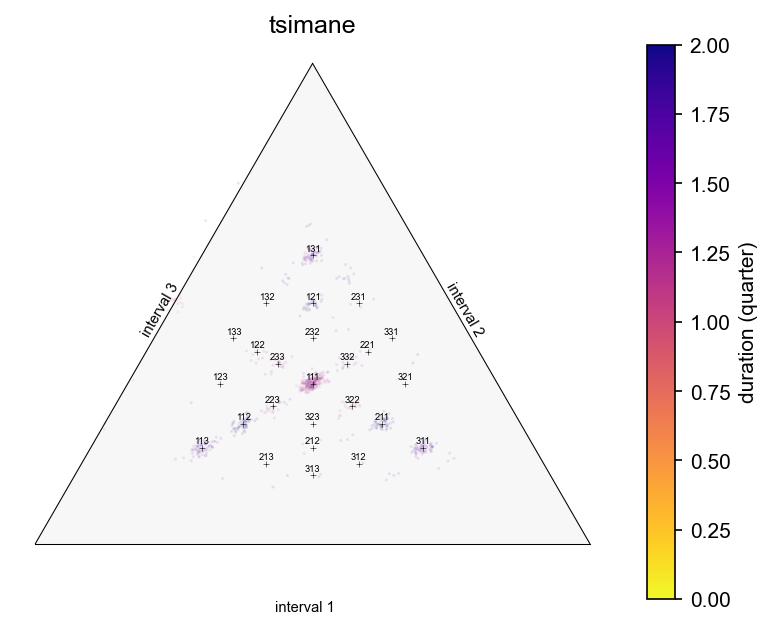

In [6]:
for corpus in CORPORA:
    onsets, _ = load_data(corpus, repeats=True)
    if len(onsets) == 0: 
        print('No onsets for', corpus)
        continue
    alpha = 1 if len(onsets) < 50 else 0.3
    motifs, duration = normalize(interval_motifs(onsets, 3))
    plt.figure()
    show_triangle_scatter(
        motifs, duration, 
        alpha=.1, s=2, limit=5000, min_dur=0, jitter=0.01
    )
    plt.title(f'{corpus}')
    if SAVE:
        plt.savefig(f'../figures/rhythm-triangles/rhythm-triangle-{corpus}.pdf')
        plt.close()